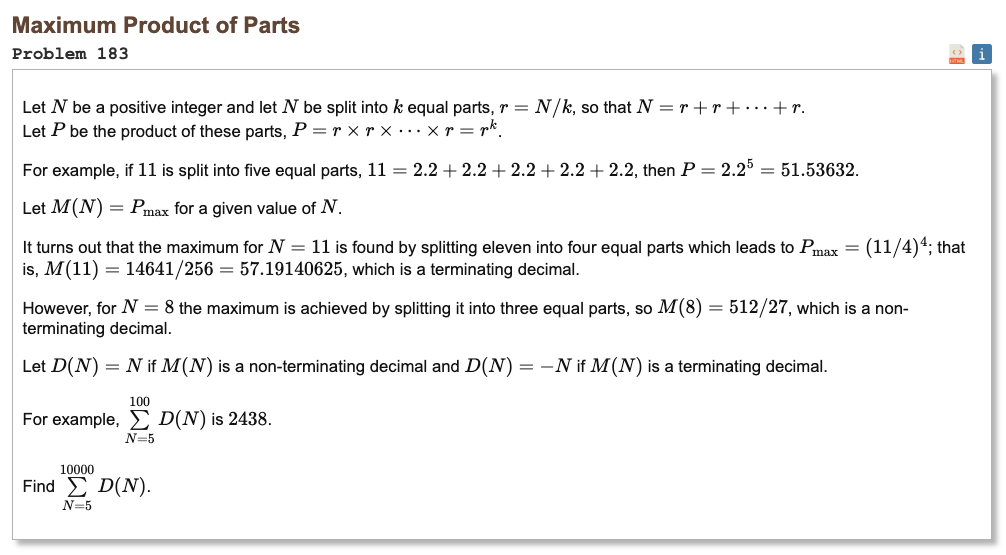

## Initial approach

* split N into k equal parts N over k, the product is (N over k) to the power k
* the best k in real numbers is around N divided by e, so for integers we just test a few k values near N over e
* to find which k is best we compare k times log(N over k) instead of the product itself
* for the best k the product is N^k over k^k, cancel gcd(N, k) to get denominator base b = k over gcd(N, k)
* the prime factors of the reduced denominator are the same as those of b
* remove all factors of 2 and 5 from b, if b becomes 1 the decimal terminates, otherwise it is non terminating
* if it terminates we set D(N) = −N, if it does not terminate we set D(N) = N
* sum D(N) for N from 5 to 10000 using math.log, math.e and math.gcd, and print the total

In [1]:
import math

def best_k_for_N(N):
    k0 = N / math.e
    candidates = set()
    base = int(k0)
    for k in (base - 1, base, base + 1, base + 2):
        if 1 <= k <= N:
            candidates.add(k)
    best_k = None
    best_val = None
    for k in candidates:
        val = k * math.log(N / k)
        if best_val is None or val > best_val:
            best_val = val
            best_k = k
    return best_k

def D(N):
    k = best_k_for_N(N)
    g = math.gcd(N, k)
    b = k // g
    while b % 2 == 0:
        b //= 2
    while b % 5 == 0:
        b //= 5
    if b == 1:
        return -N
    else:
        return N

result = 0
for N in range(5, 10001):
    result += D(N)

print("Result:", result)

Result: 48861552
